In [17]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from sklearn.cluster import KMeans
# tf.debugging.set_log_device_placement(True)
tf.test.gpu_device_name()

'/device:GPU:0'

In [18]:
# Define function for image rotation
def rotate(image, angle):
    # Get image height, width
    (h, w) = image.shape[:2]

    # Calculate the center of the image
    center = (w / 2, h / 2)

    # Rotate the image by the specified angle
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h))

    return rotated

# Define function for image noising
def add_noise(image, sigma):
    # Generate Gaussian noise
    noise = np.random.normal(0, sigma, image.shape)

    # Add the noise to the image
    noisy_image = np.clip(image + noise, 0, 255).astype(np.uint8)

    return noisy_image

In [19]:
## LOAD DATA
# Define the path to dataset folder
dataset_folder = 'subset/images/2023-04-25/3'

# Create empty list to store images
roi_RGB,roi_GRAY,roi_HSV = [],[],[]

HEIGHT = 128
WIDTH = 128

# Iterate through each file in the dataset folder
for filename in os.listdir(dataset_folder):
    image_path = os.path.join(dataset_folder, filename)

    # Load the image
    roi = cv2.imread(image_path)

    # # Get image dimensions
    # height, width = img_gray.shape[:2]

    # # Define the rotation angle in degrees
    # angle = 180

    # # Define the rotation center
    # center = (width / 2, height / 2)

    # # Perform the rotation
    # M = cv2.getRotationMatrix2D(center, angle, 1)
    # rotated_img = cv2.warpAffine(img_gray, M, (width, height))

    # Define the region of interest (ROI) to crop
    # x1, y1, x2, y2 = 149, 637,1033,1155
    # roi = img[y1:y2, x1:x2]
            
    # Resize the image
    img_resized = cv2.resize(roi, (HEIGHT,WIDTH))

    # Append the image to the list of images
    roi_RGB.append(img_resized)

    #HSV conversion
    roi_HSV.append(cv2.cvtColor(img_resized, cv2.COLOR_BGR2HSV))

    #Grayscale conversion
    roi_GRAY.append(cv2.cvtColor(img_resized, cv2.COLOR_BGR2GRAY))

In [20]:
import pandas as pd
#features extraction
features = []
for img in roi_HSV:
    H_val,S_val,V_val = img[:,:,0],img[:,:,1],img[:,:,2]
    # Extract the mean values of hue, saturation, and value
    H_mean = np.mean(H_val)
    S_mean = np.mean(S_val)
    V_mean = np.mean(V_val)
    # Extract the standard deviation of hue, saturation, and value
    H_std = np.std(H_val)
    S_std = np.std(S_val)
    V_std = np.std(V_val)
    # Extract the contrast values of hue, saturation, and value
    # H_max,S_max,V_max = np.max(H_val),np.max(S_val),np.max(V_val)
    # H_min,S_min,V_min = np.min(H_val),np.min(S_val),np.min(V_val)
    # H_contrast = (H_max - H_min) / (H_max + H_min)
    # S_contrast = (S_max - S_min) / (S_max + S_min)
    # V_contrast = (V_max - V_min) / (V_max + V_min)
    features.append([H_mean,H_std,S_mean,S_std,V_mean,V_std])
features = pd.DataFrame(features,columns=['H_mean','H_std','S_mean','S_std','V_mean','V_std'])

In [21]:
from pca import pca
# Initialize pca to detected outliers
model = pca(normalize=True, detect_outliers=['ht2', 'spe'], n_std=2  )
# Fit and transform pca
results = model.fit_transform(features)


[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >Normalizing input data per feature (zero mean and unit variance)..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [6] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [4] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [6] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[4]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


[pca] >Plot PC1 vs PC2 with loadings.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


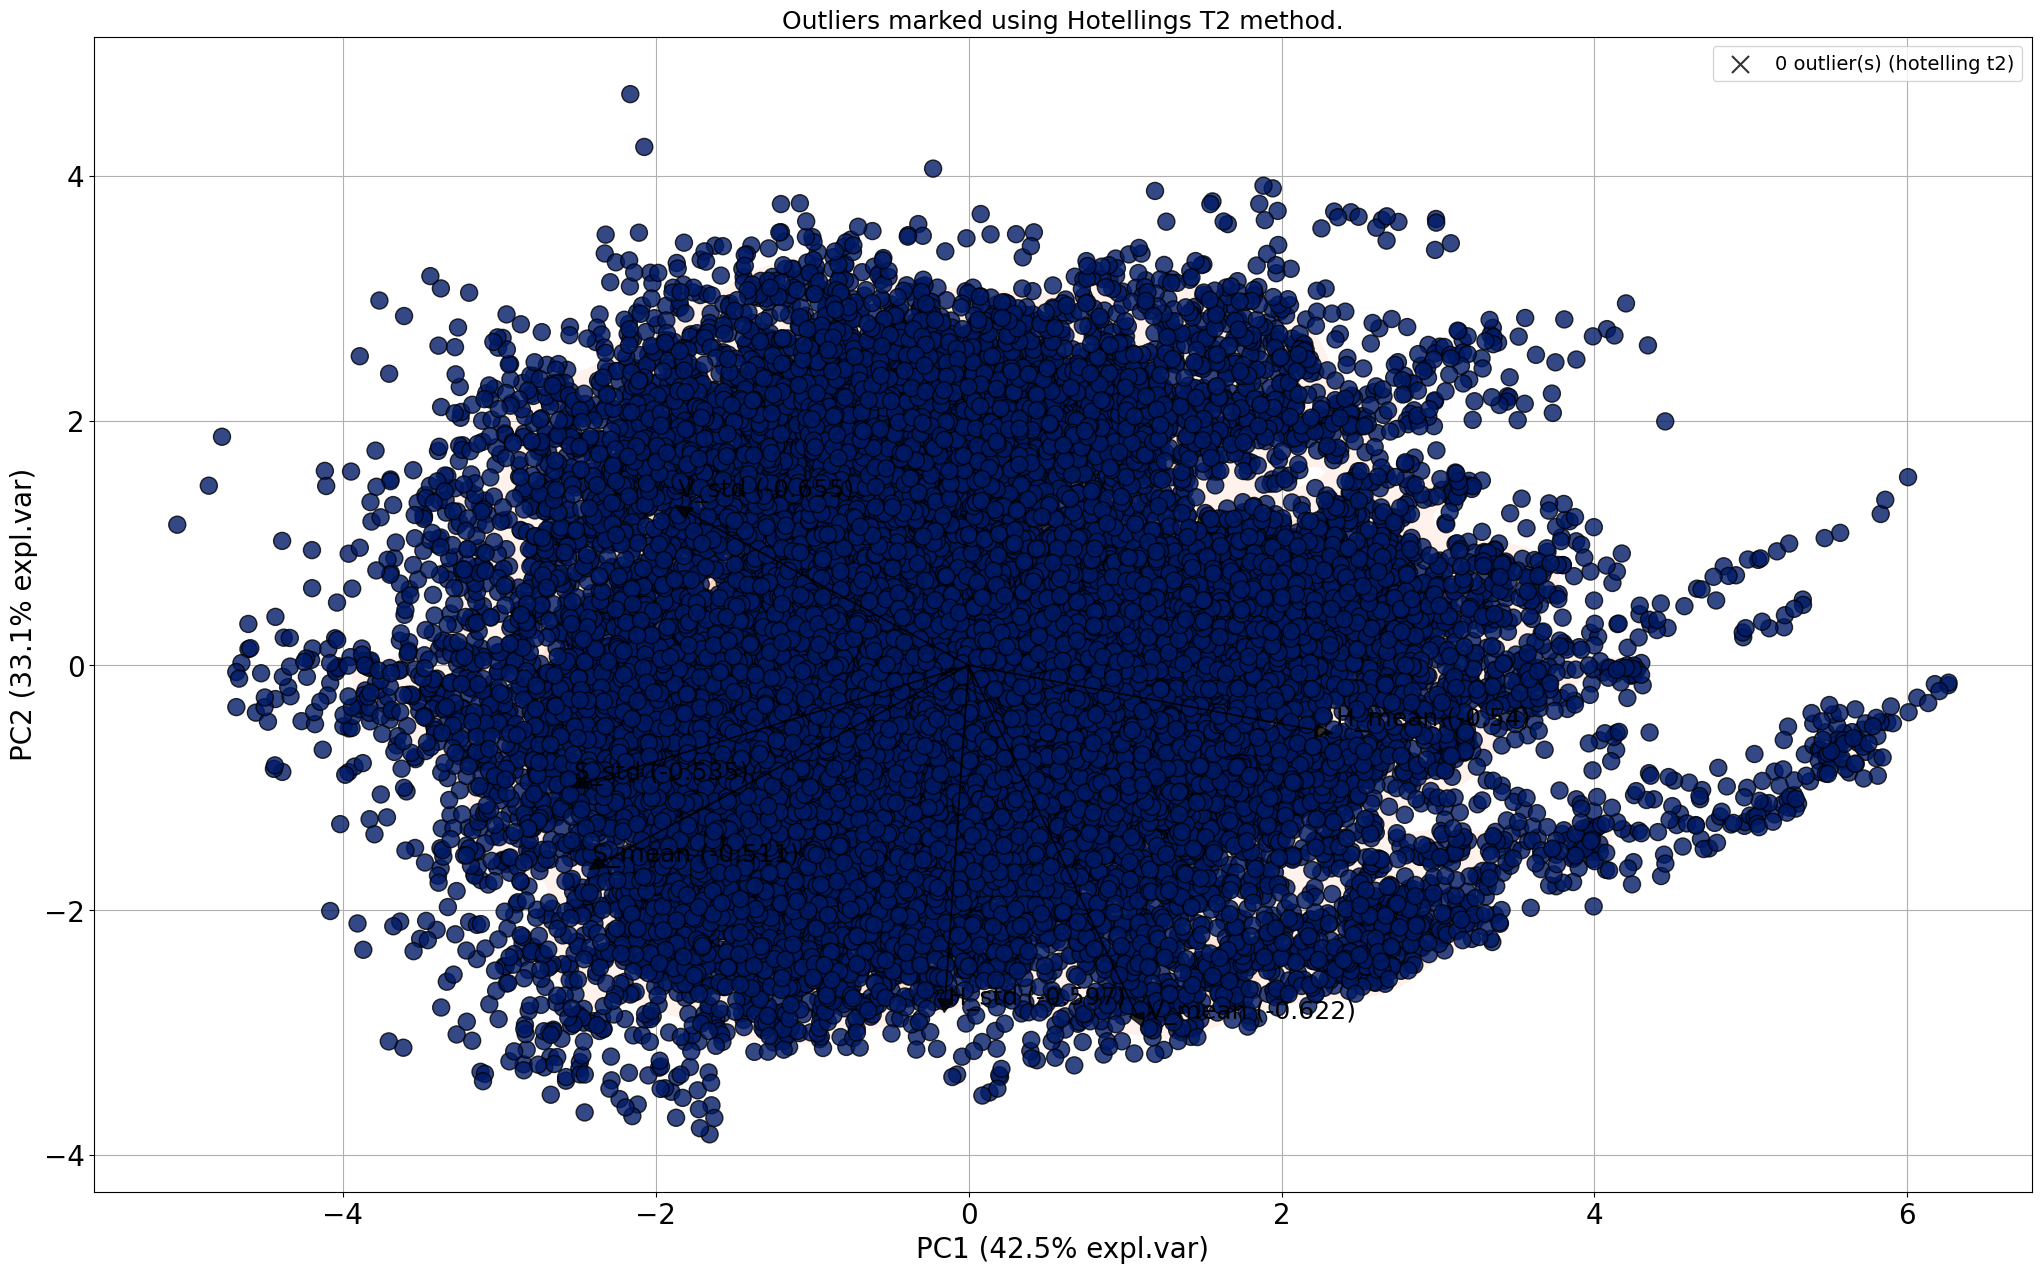

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[pca] >Plot PC1 vs PC2 vs PC3 with loadings.


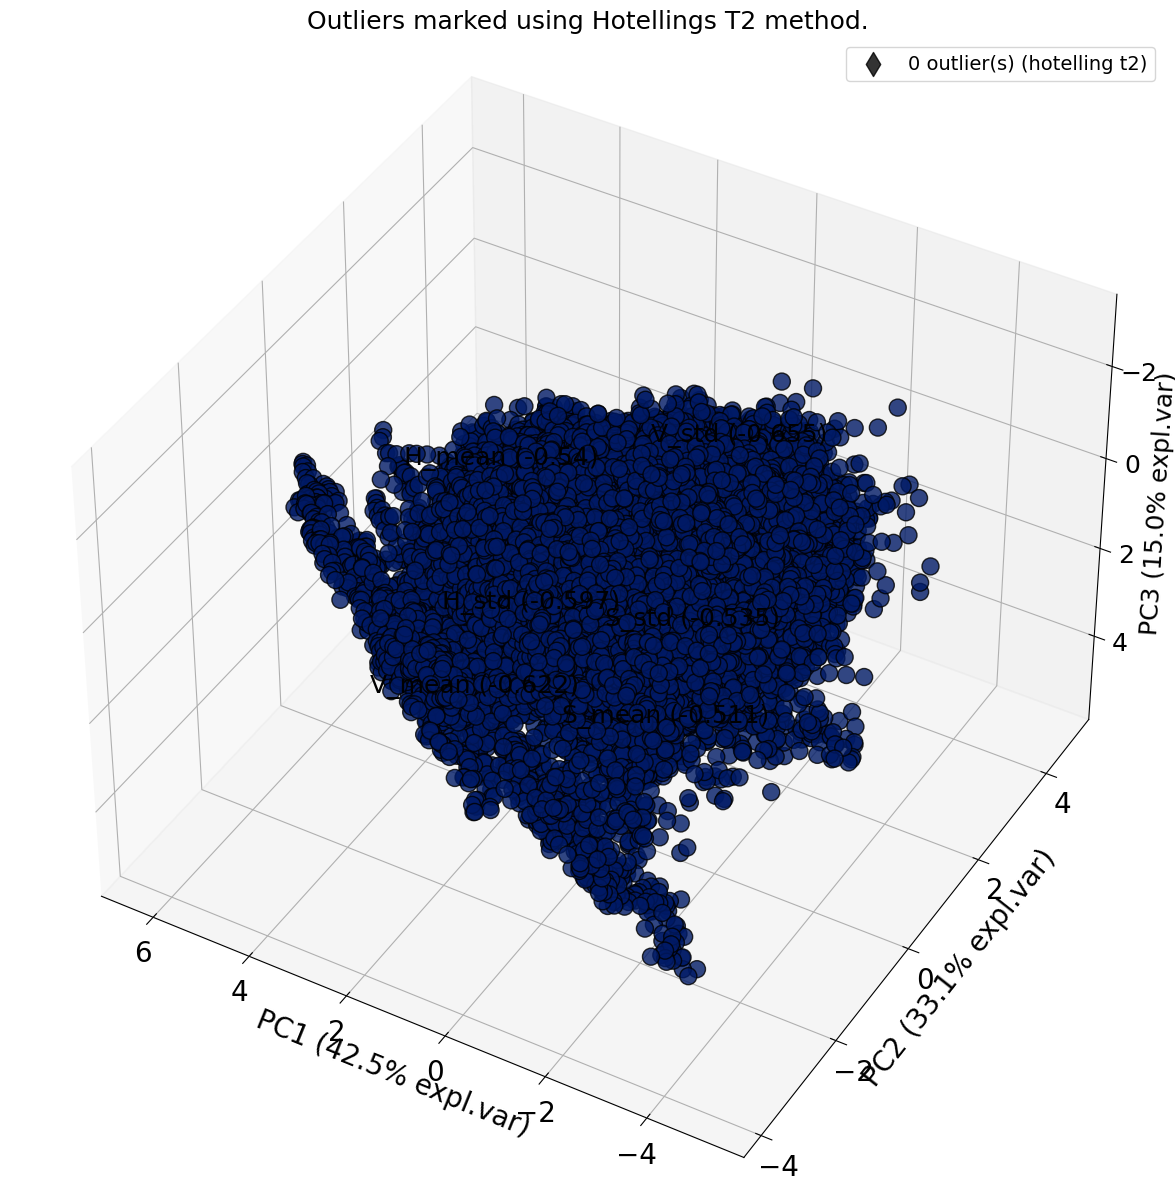

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[pca] >Plot PC1 vs PC2 with loadings.


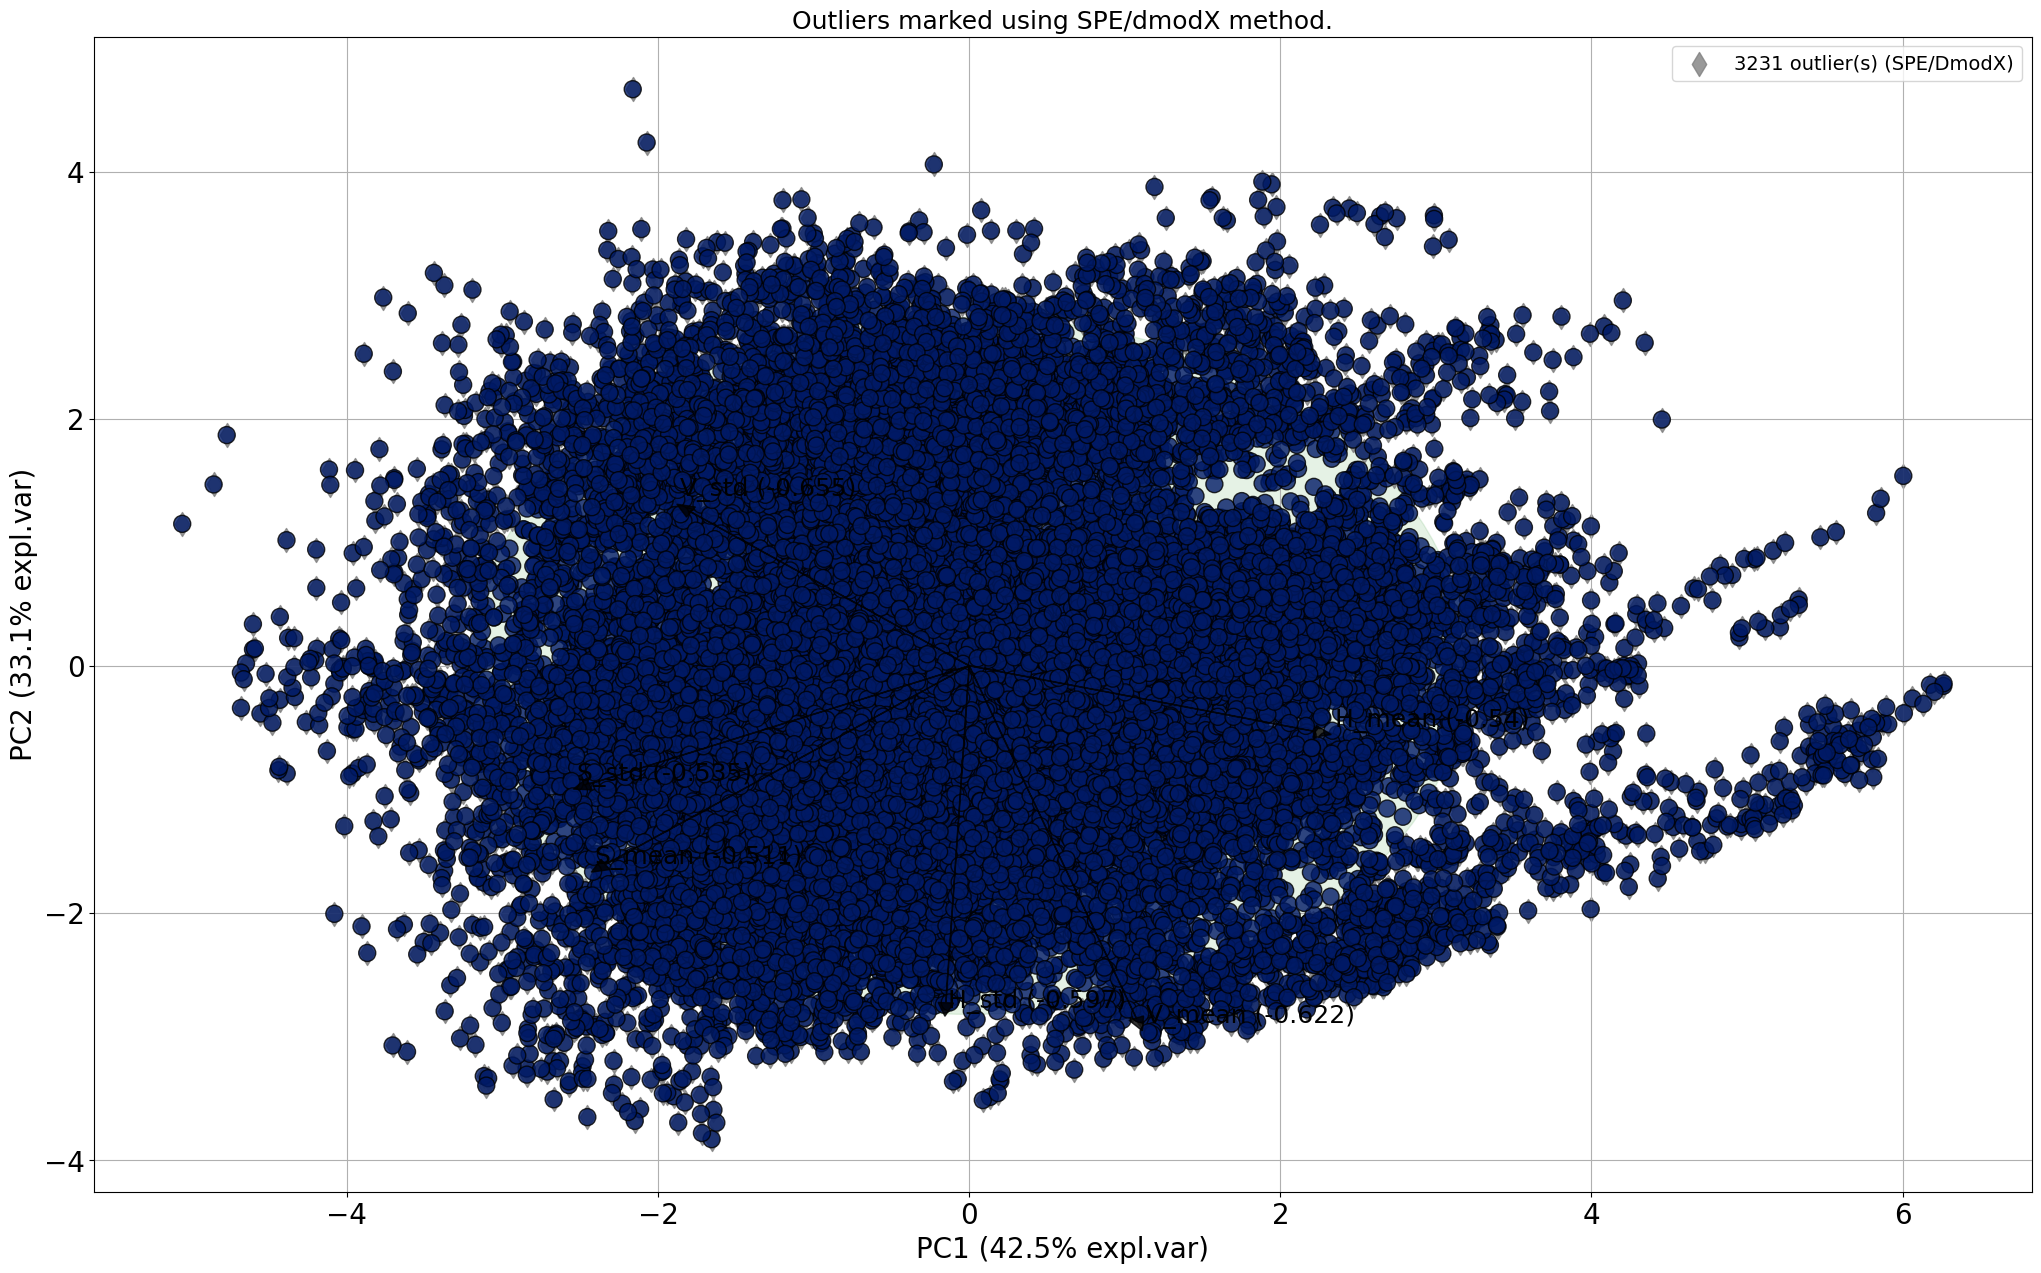

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[pca] >Plot PC1 vs PC2 with loadings.


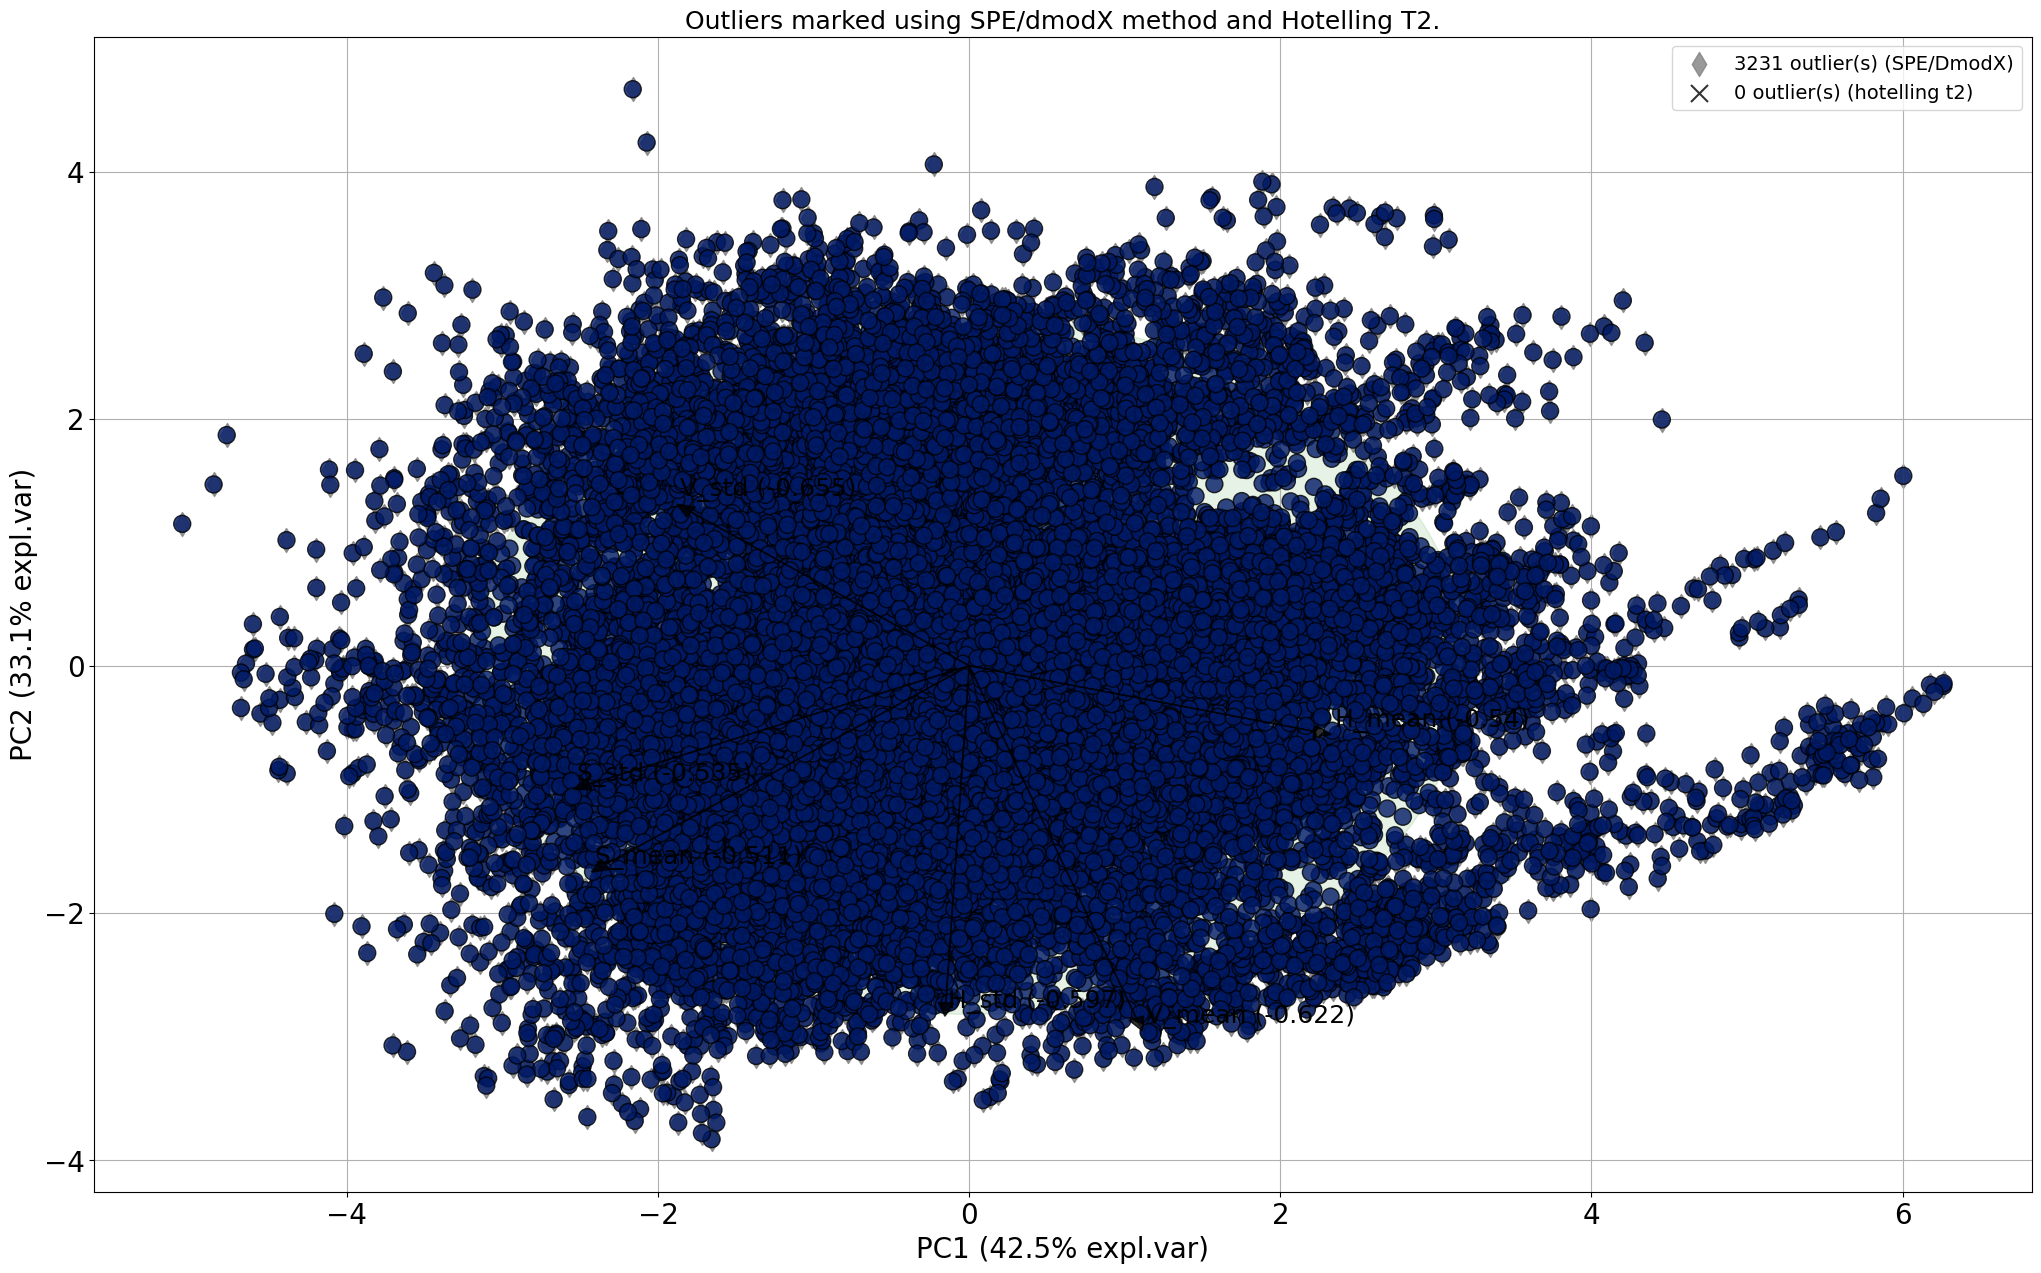

H_mean      H_std     S_mean      S_std      V_mean     V_std
678    82.636597  69.776387  31.190430  34.604112  245.922302  5.615857
679    75.283569  63.240009  30.386841  35.324049  245.135010  5.649822
680    73.772217  59.960055  30.582336  34.954605  245.090820  6.055382
703    67.690063  57.347222  31.912537  33.259290  244.665161  5.898676
704    69.413147  58.198036  33.053040  35.570541  244.994507  5.677605
...          ...        ...        ...        ...         ...       ...
25155  78.632812  35.251795  13.608337  17.115081  244.053894  5.387609
25156  80.408813  33.419804  13.745850  19.435254  244.102539  5.146497
25157  81.301270  33.261696  13.513245  18.349477  244.183472  5.523998
25158  80.984314  34.034110  14.311768  19.541871  244.284485  5.152727
25159  81.506348  33.936895  13.733459  18.506421  244.118286  5.654624

[3231 rows x 6 columns]

In [22]:
# Plot Hotellings T2
model.biplot(SPE=False, HT2=True, density=True, title='Outliers marked using Hotellings T2 method.')

# Make a plot in 3 dimensions
model.biplot3d(SPE=False, HT2=True, density=False, title='Outliers marked using Hotellings T2 method.')

# Get the outliers using SPE/DmodX method.
features.loc[results['outliers']['y_bool'], :]

# Plot SPE/DmodX method
model.biplot(SPE=True, HT2=False, title='Outliers marked using SPE/dmodX method.')

# Make a plot in 3 dimensions
model.biplot(SPE=True, HT2=True, title='Outliers marked using SPE/dmodX method and Hotelling T2.')

# Get the outliers using SPE/DmodX method.
features.loc[results['outliers']['y_bool_spe'], :]

<Axes: >

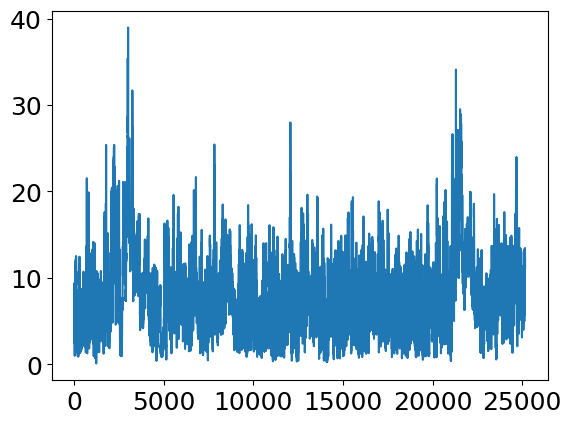

In [23]:
results['outliers'].y_score.plot()

<Axes: >

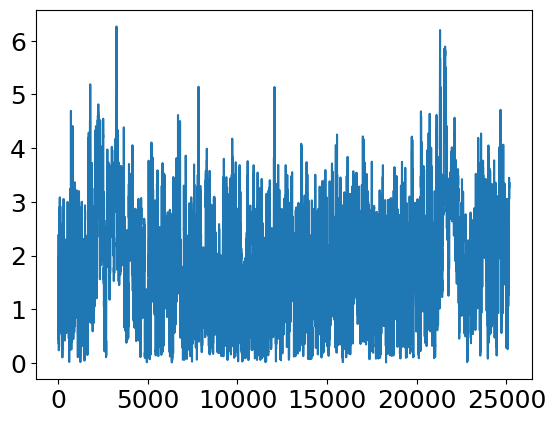

In [24]:
results['outliers'].y_score_spe.plot()

In [25]:
results['outliers']

y_proba     p_raw    y_score  y_bool  y_bool_spe  y_score_spe
0          1.0  0.961531   2.504286   False       False     0.551206
1          1.0  0.951114   2.711964   False       False     0.566980
2          1.0  0.925262   3.140072   False       False     0.740055
3          1.0  0.940872   2.893340   False       False     0.456552
4          1.0  0.736568   5.194790   False       False     1.398327
...        ...       ...        ...     ...         ...          ...
25155      1.0  0.097003  13.458988   False        True     3.389464
25156      1.0  0.149775  12.032164   False        True     3.248403
25157      1.0  0.133145  12.426982   False        True     3.366224
25158      1.0  0.196757  11.088111   False        True     3.051153
25159      1.0  0.146220  12.113287   False        True     3.349524

[25160 rows x 6 columns]

In [26]:
len(roi_GRAY)

25160

In [27]:
## DATA Augmentation

# Define rotation angle in degrees
angle = 90

# Define standard deviation of the Gaussian noise
sigma = 30

# Augment the dataset by rotation and noising
# images_flipped = np.array([cv2.flip(image, 0) for image in roi_GRAY])
# images_noisy = np.array([add_noise(image, sigma) for image in roi_GRAY])

# Concatenate the original and augmented datasets
# X = np.concatenate((roi_GRAY,images_noisy,images_flipped), axis=0)
# y = np.concatenate((images_origin,images_origin,images_flipped), axis=0)
# X_train, X_test= train_test_split(images)
# 
# X_train = np.reshape(X_train,(len(X_train),128,128))

X = np.reshape(roi_GRAY,(len(roi_GRAY),HEIGHT,WIDTH,1))
#Normalize
X = X.astype("float32") / 255.0
# y = y.astype("float32") / 255.0


In [28]:
# Define the autoencoder model
input_img = keras.Input(shape=X.shape[1:])

# Encoder Layers
x = keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(input_img)
x = keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = keras.layers.MaxPooling2D((2, 2), padding='same')(x)

# Decoder Layers
x = keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = keras.layers.UpSampling2D((2, 2))(x)
x = keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = keras.layers.UpSampling2D((2, 2))(x)
x = keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = keras.layers.UpSampling2D((2, 2))(x)
decoded = keras.layers.Conv2D(X.shape[3], (3, 3), activation='sigmoid', padding='same')(x)

# Define the SSIM loss function
def ssim_loss(y_true, y_pred):
    ssim_value = tf.reduce_mean(tf.image.ssim(y_true, y_pred, max_val=1.0))
    return 1.0 - ssim_value

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss=ssim_loss)

# Train the autoencoder
autoencoder.fit(X, X,
                epochs=20,
                batch_size=2,
                shuffle=True)


InternalError: Failed copying input tensor from /job:localhost/replica:0/task:0/device:CPU:0 to /job:localhost/replica:0/task:0/device:GPU:0 in order to run _EagerConst: Dst tensor is not initialized.

In [ ]:
autoencoder.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 128, 128, 1)]     0         
                                                                 
 conv2d_7 (Conv2D)           (None, 128, 128, 64)      640       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 64, 64, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 64, 64, 16)        9232      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 32, 32, 16)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 32, 32, 8)         1160

In [ ]:
import random
decoded_imgs = autoencoder.predict(X)
n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    random_number = random.randint(0, len(X)-1)
    # Display original image
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X[random_number])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstructed image
    ax = plt.subplot(2, n, i + n + 1)
    plt.imshow(decoded_imgs[random_number])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
# Extract the deep features
encoder = keras.Model(input_img, encoded)
encoded_imgs = encoder.predict(X)


105/105 [==============================] - 1s 7ms/step


In [ ]:
print(encoded_imgs.shape)
encoded_imgs = encoded_imgs.reshape(len(X), 2048)

In [ ]:
# Cluster the encoded images using K-means
kmeans = KMeans(n_clusters=2, random_state=0).fit(encoded_imgs)

# Print the cluster centers
print(kmeans.cluster_centers_)

In [ ]:
from sklearn.manifold import TSNE
# Use t-SNE to visualize the clusters
tsne = TSNE(n_components=2, random_state=0)
tsne_transformed = tsne.fit_transform(encoded_imgs)

# Plot the clusters
plt.figure(figsize=(10, 10))
colors = plt.cm.tab10(np.linspace(0, 1, 10))
for i in range(2):
    plt.scatter(tsne_transformed[kmeans.labels_ == i, 0],
                tsne_transformed[kmeans.labels_ == i, 1],
                s=30, c=colors[i], label='Cluster %d' % i)
plt.legend()
plt.title('t-SNE visualization of K-means clusters')
plt.show()

In [ ]:
import random
# Display the samples and their corresponding clusters
fig, ax = plt.subplots(2, 5, figsize=(15, 5))
ax = ax.flatten()
n = 0 #Number of images
for i in range(2):
    # Get the indices of the images belonging to cluster i
    indices = np.where(kmeans.labels_ == i)[0]
    
    # Display the 5 first images of each cluster
    for j in range(5):
        random_number = random.randint(0, len(indices)-1)
        ax[n].imshow(X[indices[random_number]].reshape(128,128), cmap='gray')
        ax[n].set_title(f"Cluster {i}, sample {j}")
        ax[n].axis('off')
        n+=1
plt.show()